In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## Putting it all together

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# Data

weight = 0.5
bias  = 0.2

# Create range of values

start = 0
end = 100
step = 0.2

X = torch.arange(start, end, step, dtype=torch.float32).unsqueeze(1)
y = weight*X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]),
 tensor([[0.2000],
         [0.3000],
         [0.4000],
         [0.5000],
         [0.6000]]))

In [17]:
# Split data into training and testing sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

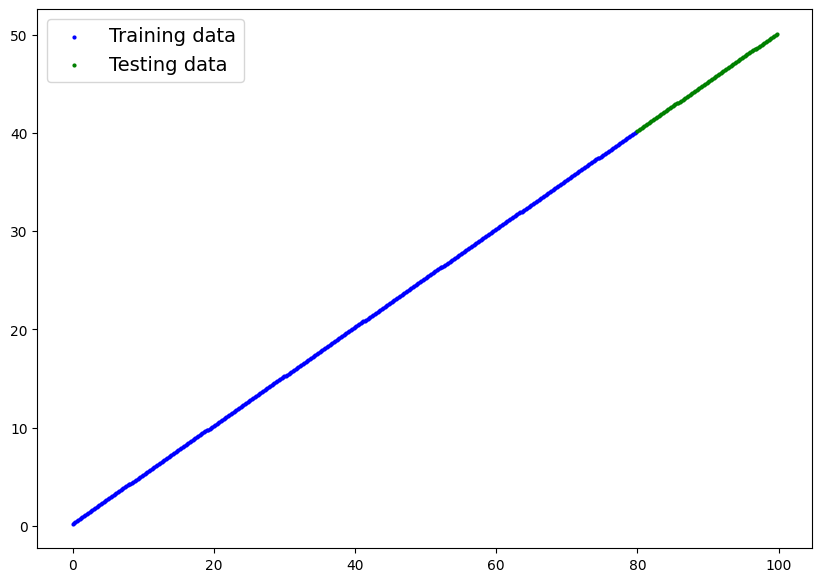

In [18]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_labels,predictions,c="r",s=4,label="Predictions")
    
    plt.legend(prop={"size":14})
    plt.show()

plot_predictions()

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1,out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

# manual seed for reproducibility
torch.manual_seed(42)


In [20]:
model_1 = LinearRegressionModel()
model_1.state_dict()
model_1.to(device)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
## Train the model
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# Move data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Setup training
epochs = 1000
train_losses = []
test_losses = []
best_test_loss = float('inf')

# Training loop
print(f"Training on: {device}")
for epoch in range(epochs):
    # Training
    model_1.train()
    
    # 1. Forward pass
    y_pred = model_1(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    # Testing
    model_1.eval()
    with torch.inference_mode():
        y_test_pred = model_1(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        test_losses.append(test_loss.item())
        
        # Save best model
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            torch.save(model_1.state_dict(), '../models/best_linear_model.pth')
    
    # Print progress
    if epoch % 100 == 0 or epoch == epochs-1:
        print(f"Epoch: {epoch}/{epochs} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.title("Training and Testing Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Load best model and make predictions
model_1.load_state_dict(torch.load('../models/best_linear_model.pth'))
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
    
# Plot predictions
plot_predictions(predictions=y_preds.cpu())

# Display final model parameters
print(f"Final model parameters:")
for name, param in model_1.named_parameters():
    print(f"{name}: {param.data.flatten().tolist()}")

# Compare with true parameters
print(f"\nTrue parameters:")
print(f"Weight: {weight}, Bias: {bias}")

Training on: cuda
Epoch: 0 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 10 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 20 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 30 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 40 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 50 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 60 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 70 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 80 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 90 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 100 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 110 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 120 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 130 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 140 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 150 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 160 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 170 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 180 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 190 | Loss: 15.44201 | Test Loss: 1.08723
Epoch: 200 | 